# Split-Apply-Combine
apply 하기

In [1]:
import pandas as pd
import numpy as np

## 데이터 읽어오기 + 관찰

In [2]:
payment_df = pd.read_csv(r'D:\DevRoot\DataSet\mysql\sakila\payment.csv')
customer_df = pd.read_csv(r'D:\DevRoot\DataSet\mysql\sakila\customer.csv')

In [3]:
payment_df.head()

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30


In [4]:
customer_df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  599 non-null    int64 
 1   store_id     599 non-null    int64 
 2   first_name   599 non-null    object
 3   last_name    599 non-null    object
 4   email        599 non-null    object
 5   address_id   599 non-null    int64 
 6   active       599 non-null    int64 
 7   create_date  599 non-null    object
 8   last_update  599 non-null    object
dtypes: int64(4), object(5)
memory usage: 42.2+ KB


In [6]:
customer_df.describe()

,customer_id,store_id,address_id,active
count,599.000000,599.000000,599.000000,599.000000
mean,300.000000,1.455760,304.724541,0.974958
std,173.060683,0.498455,173.698609,0.156382
min,1.000000,1.000000,5.000000,0.000000
25%,150.500000,1.000000,154.500000,1.000000
50%,300.000000,1.000000,305.000000,1.000000
75%,449.500000,2.000000,454.500000,1.000000
max,599.000000,2.000000,605.000000,1.000000


In [7]:
payment_df.shape, customer_df.shape

((16049, 7), (599, 9))

# 고객별 주문량(amount) 횟수와 합계

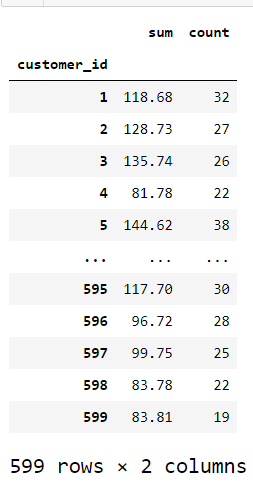

In [10]:
revenue_per_user_df = payment_df.groupby('customer_id').agg({
    "amount" : ["sum", "count"]
})['amount']

revenue_per_user_df

,sum,count
customer_id,,
1,118.68,32
2,128.73,27
3,135.74,26
4,81.78,22
5,144.62,38
...,...,...
595,117.70,30
596,96.72,28
597,99.75,25


# 결제 횟수가 가장 많은 상위 유저 10명
- customer_id, 이메일, 결제금액, 결제횟수

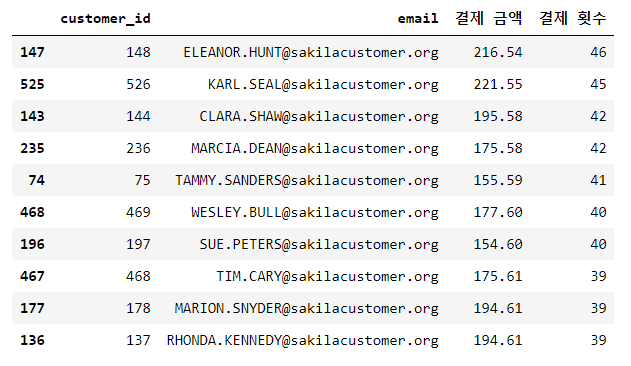

In [11]:
revenue_per_user_df.head()

,sum,count
customer_id,,
1,118.68,32
2,128.73,27
3,135.74,26
4,81.78,22
5,144.62,38


In [12]:
customer_df.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [14]:
merged_df = pd.merge(
    customer_df,         # LEFT
    revenue_per_user_df,  # RIGHT
    left_on="customer_id",  # 왼쪽(customer_df) 의 'customer_id' 컬럼과
    right_index=True    # 오른쪽(revenue_per_user_df) 의 'index' 를 merge 한다
    
    # left_on / right_on : 특정 칼럼을 기준으로
    # left_index / right_index: 인덱스를 기준으로
)
merged_df

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update,sum,count
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20,118.68,32
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20,128.73,27
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20,135.74,26
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20,81.78,22
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20,144.62,38
...,...,...,...,...,...,...,...,...,...,...,...
594,595,1,TERRENCE,GUNDERSON,TERRENCE.GUNDERSON@sakilacustomer.org,601,1,2006-02-14 22:04:37,2006-02-15 04:57:20,117.70,30
595,596,1,ENRIQUE,FORSYTHE,ENRIQUE.FORSYTHE@sakilacustomer.org,602,1,2006-02-14 22:04:37,2006-02-15 04:57:20,96.72,28
596,597,1,FREDDIE,DUGGAN,FREDDIE.DUGGAN@sakilacustomer.org,603,1,2006-02-14 22:04:37,2006-02-15 04:57:20,99.75,25
597,598,1,WADE,DELVALLE,WADE.DELVALLE@sakilacustomer.org,604,1,2006-02-14 22:04:37,2006-02-15 04:57:20,83.78,22


In [19]:
merged_df[["customer_id", "email", "sum", "count"]]\
    .rename(
        columns={"sum":"결제금액", "count":"결제횟수"}
    )\
    .sort_values(by="결제횟수", ascending=False)\
    .head(10)

,customer_id,email,결제금액,결제횟수
147,148,ELEANOR.HUNT@sakilacustomer.org,216.54,46
525,526,KARL.SEAL@sakilacustomer.org,221.55,45
143,144,CLARA.SHAW@sakilacustomer.org,195.58,42
235,236,MARCIA.DEAN@sakilacustomer.org,175.58,42
74,75,TAMMY.SANDERS@sakilacustomer.org,155.59,41
468,469,WESLEY.BULL@sakilacustomer.org,177.60,40
196,197,SUE.PETERS@sakilacustomer.org,154.60,40
467,468,TIM.CARY@sakilacustomer.org,175.61,39
177,178,MARION.SNYDER@sakilacustomer.org,194.61,39
136,137,RHONDA.KENNEDY@sakilacustomer.org,194.61,39


In [ ]:
# SPLIT - APPLY - COMBINE
#  각각의 함수들이 '어떠한 input' 을 받아서 '어떠한 output' 을 내는지
#  정확하게 아는 것이 중요하다.

# ★ 이 함수들은 groupby() 의 결과물은 DataFrameGroupBy 객체의 함수들이다 ★


# 1. .aggregate() / .agg() ( 집계하는 연산 )

#     <input>     <output>
# [1, 2, 3, 4] => 10(sum), 2.5(mean)
#              => [3, 7](sum), [1.5, 3.5](mean)  두개씩 묶는 다면.

#     <input>     <output>
# 데이터 갯수: N => 1개 

# 2. .transform() ( 데이터를 변형하는 연산 )
# x[1, 2, 3, 4] => [10, 10, 10, 10] (sum)
#                 [2.5, 2.5, 2.5, 2.5] (mean)
#                                      ( x - mean ) 원본 - 평균연산.
#                 [-1.5, -0.5, 0.5, 1.5]

# 3. .apply()
# [1, 2, 3, 4] => 10(sum)
#              => [4, 3, 2] ( 상위의 3개만 뽑자 )
# 데이터 갯수: N => 1(agg), N(transform), M(apply)



# 4. filter() ( SQL 의 HAVING 역할)
# payment_df 유저별 결제 횟수 ( 16000개 )
# 결제횟수가 30회 이상인 유저들에 대해서만, 결제 내역들을 전부 뽑자
# 16000(N) => 5000개(N>=)


# 결제횟수가 30번 이상인 유저들의 결제 내역
1. filter() 사용한 방법
1. apply() 사용한 방법

### filter() 를 사용한 방법

In [22]:
group = payment_df.groupby('customer_id')

In [ ]:
# group.filter(함수)  <- 이 함수는 참/거짓 판명을 리턴

In [23]:
group.size()

customer_id
1      32
2      27
3      26
4      22
5      38
       ..
595    30
596    28
597    25
598    22
599    19
Length: 599, dtype: int64

In [24]:
for group_id, group_df in group:
    print(group_id, group_df.shape)

1 (32, 7)
2 (27, 7)
3 (26, 7)
4 (22, 7)
5 (38, 7)
6 (28, 7)
7 (33, 7)
8 (24, 7)
9 (23, 7)
10 (25, 7)
11 (24, 7)
12 (28, 7)
13 (27, 7)
14 (28, 7)
15 (32, 7)
16 (29, 7)
17 (21, 7)
18 (22, 7)
19 (24, 7)
20 (30, 7)
21 (35, 7)
22 (22, 7)
23 (30, 7)
24 (25, 7)
25 (29, 7)
26 (34, 7)
27 (31, 7)
28 (32, 7)
29 (36, 7)
30 (34, 7)
31 (26, 7)
32 (29, 7)
33 (21, 7)
34 (24, 7)
35 (32, 7)
36 (27, 7)
37 (23, 7)
38 (34, 7)
39 (29, 7)
40 (27, 7)
41 (25, 7)
42 (30, 7)
43 (24, 7)
44 (26, 7)
45 (27, 7)
46 (34, 7)
47 (22, 7)
48 (17, 7)
49 (28, 7)
50 (35, 7)
51 (33, 7)
52 (29, 7)
53 (30, 7)
54 (29, 7)
55 (22, 7)
56 (30, 7)
57 (28, 7)
58 (27, 7)
59 (27, 7)
60 (25, 7)
61 (14, 7)
62 (23, 7)
63 (25, 7)
64 (33, 7)
65 (22, 7)
66 (34, 7)
67 (22, 7)
68 (22, 7)
69 (25, 7)
70 (18, 7)
71 (30, 7)
72 (30, 7)
73 (24, 7)
74 (27, 7)
75 (41, 7)
76 (23, 7)
77 (28, 7)
78 (31, 7)
79 (22, 7)
80 (30, 7)
81 (22, 7)
82 (26, 7)
83 (25, 7)
84 (33, 7)
85 (23, 7)
86 (33, 7)
87 (30, 7)
88 (21, 7)
89 (32, 7)
90 (28, 7)
91 (35, 7)
92 (28, 

In [25]:
group.filter(lambda x : x.shape[0] >= 30)

# 결과가

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30
...,...,...,...,...,...,...,...
15950,15951,595,1,12235.0,0.99,2005-08-18 03:17:50,2006-02-15 22:23:49
15951,15952,595,1,14334.0,0.99,2005-08-21 08:32:32,2006-02-15 22:23:50
15952,15953,595,2,15576.0,2.99,2005-08-23 05:32:03,2006-02-15 22:23:50
15953,15954,595,2,15994.0,0.99,2005-08-23 20:29:10,2006-02-15 22:23:50


In [26]:
payment_df.shape

(16049, 7)

In [ ]:
# filter
# payment_df ( 16049 ) => 결제 횟수가 30번 이상인 유저들의 결제 내역
# filter로 구현하기! 

# group.filter(lambda x: x.shape[0] >= 30).shape  -> 5848개


# x 는 DataFrame , groupby() 로 split 된 각 DataFrame

# filter() 의 결과(리턴값) 도 combine 된 DataFrame

### apply() 를 사용한 방법

In [27]:
group.agg("sum")

,payment_id,staff_id,rental_id,amount
customer_id,,,,
1,528,47,241137.0,118.68
2,1242,39,257716.0,128.73
3,1885,38,206151.0,135.74
4,2123,32,197174.0,81.78
5,4807,59,300857.0,144.62
...,...,...,...,...
595,478215,43,249436.0,117.70
596,447146,39,230951.0,96.72
597,399900,36,218772.0,99.75


In [29]:
group.apply(lambda x : x)
# 원본이 그대로 나온다?  (group 이름으로 사용된 customer_id 는 빠진다!)

,payment_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30
...,...,...,...,...,...,...
16044,16045,1,14599.0,4.99,2005-08-21 17:43:42,2006-02-15 22:24:12
16045,16046,1,14719.0,1.99,2005-08-21 21:41:57,2006-02-15 22:24:12
16046,16047,2,15590.0,8.99,2005-08-23 06:09:44,2006-02-15 22:24:12
16047,16048,2,15719.0,2.99,2005-08-23 11:08:46,2006-02-15 22:24:13


In [30]:
payment_df

,payment_id,customer_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,1,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,1,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30
...,...,...,...,...,...,...,...
16044,16045,599,1,14599.0,4.99,2005-08-21 17:43:42,2006-02-15 22:24:12
16045,16046,599,1,14719.0,1.99,2005-08-21 21:41:57,2006-02-15 22:24:12
16046,16047,599,2,15590.0,8.99,2005-08-23 06:09:44,2006-02-15 22:24:12
16047,16048,599,2,15719.0,2.99,2005-08-23 11:08:46,2006-02-15 22:24:13


In [31]:
# group.apply(lambda input : output)

# apply 함수의 Input 으로는 group_df 그룹 데이터 프레임
# apply 함수의 Output 으로는 
#    - Value(agg), 
#    - Series, 
#    - DataFrame(N=>M)

In [32]:
group.apply(lambda df : 100)  # 무조건 value 100을 출력. 

# 이렇게 output 된 value 들이 combine 되면 아래와 같은 Series 가 된다.

customer_id
1      100
2      100
3      100
4      100
5      100
      ... 
595    100
596    100
597    100
598    100
599    100
Length: 599, dtype: int64

In [33]:
group.apply(lambda df : pd.Series([100, 200, 300]))  # Series 가 Output

# Output 된 Series 들이 combine 되면 아래와 같은 DataFrame 이 된다.

,0,1,2
customer_id,,,
1,100,200,300
2,100,200,300
3,100,200,300
4,100,200,300
5,100,200,300
...,...,...,...
595,100,200,300
596,100,200,300
597,100,200,300


In [34]:
group.apply(lambda df : pd.Series([100, 200, 300], 
                                 index=['A','B','C']))    # combine 결과의 컬럼이 된다

,A,B,C
customer_id,,,
1,100,200,300
2,100,200,300
3,100,200,300
4,100,200,300
5,100,200,300
...,...,...,...
595,100,200,300
596,100,200,300
597,100,200,300


In [35]:
group.apply(lambda df : pd.Series(
    [100, 200, 300, df.amount.sum()], 
    index=['A','B','C', '결제 금액']))

,A,B,C,결제 금액
customer_id,,,,
1,100.0,200.0,300.0,118.68
2,100.0,200.0,300.0,128.73
3,100.0,200.0,300.0,135.74
4,100.0,200.0,300.0,81.78
5,100.0,200.0,300.0,144.62
...,...,...,...,...
595,100.0,200.0,300.0,117.70
596,100.0,200.0,300.0,96.72
597,100.0,200.0,300.0,99.75


In [40]:
# 만약에 customer_df 의 갯수가 30개 이상이면
# => 원본 그대로 저장 
# 30개 보다 작다면 
# => 하나도 안남기고 전부 버림

def get_all_or_none(df):
    if len(df) >= 30:
        return df
    else:
#         return df.head(0)
#        return None   # return None 해도 동작한다
        pass   # 걍 pass 해도 동작한다, 심지어 else 절 없어도 동작한다
group.apply(get_all_or_none)

payment_id  staff_id  rental_id  amount  \
customer_id                                                  
1           0               1         1       76.0    2.99   
            1               2         1      573.0    0.99   
            2               3         1     1185.0    5.99   
            3               4         2     1422.0    0.99   
            4               5         2     1476.0    9.99   
...                       ...       ...        ...     ...   
595         15950       15951         1    12235.0    0.99   
            15951       15952         1    14334.0    0.99   
            15952       15953         2    15576.0    2.99   
            15953       15954         2    15994.0    0.99   
            15954       15955         2    16016.0    2.99   

                          payment_date          last_update  
customer_id                                                  
1           0      2005-05-25 11:30:37  2006-02-15 22:12:30  
            1      2005-05-28 10:35:23  2006-02-15 22:12:30  
            2      2005-06-15 00:54:12  2006-02-15 22:12:30  
            3      2005-06-15 18:02:53  2006-02-15 22:12:30  
            4      2005-06-15 21:08:46  2006-02-15 22:12:30  
...                                ...                  ...  
595         15950  2005-08-18 03:17:50  2006-02-15 22:23:49  
            15951  2005-08-21 08:32:32  2006-02-15 22:23:50  
            15952  2005-08-23 05:32:03  2006-02-15 22:23:50  
            15953  2005-08-23 20:29:10  2006-02-15 22:23:50  
            15954  2005-08-23 21:26:35  2006-02-15 22:23:50  

[5848 rows x 6 columns]

#### 정리
filter 사용 & apply() 사용

In [41]:
group.filter(lambda df: len(df) >= 30)

,payment_id,staff_id,rental_id,amount,payment_date,last_update
0,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
1,2,1,573.0,0.99,2005-05-28 10:35:23,2006-02-15 22:12:30
2,3,1,1185.0,5.99,2005-06-15 00:54:12,2006-02-15 22:12:30
3,4,2,1422.0,0.99,2005-06-15 18:02:53,2006-02-15 22:12:30
4,5,2,1476.0,9.99,2005-06-15 21:08:46,2006-02-15 22:12:30
...,...,...,...,...,...,...
15950,15951,1,12235.0,0.99,2005-08-18 03:17:50,2006-02-15 22:23:49
15951,15952,1,14334.0,0.99,2005-08-21 08:32:32,2006-02-15 22:23:50
15952,15953,2,15576.0,2.99,2005-08-23 05:32:03,2006-02-15 22:23:50
15953,15954,2,15994.0,0.99,2005-08-23 20:29:10,2006-02-15 22:23:50


In [43]:
group.apply(lambda x : x if len(x) >= 30 else x.head(0))

payment_id  staff_id  rental_id  amount  \
customer_id                                                  
1           0               1         1       76.0    2.99   
            1               2         1      573.0    0.99   
            2               3         1     1185.0    5.99   
            3               4         2     1422.0    0.99   
            4               5         2     1476.0    9.99   
...                       ...       ...        ...     ...   
595         15950       15951         1    12235.0    0.99   
            15951       15952         1    14334.0    0.99   
            15952       15953         2    15576.0    2.99   
            15953       15954         2    15994.0    0.99   
            15954       15955         2    16016.0    2.99   

                          payment_date          last_update  
customer_id                                                  
1           0      2005-05-25 11:30:37  2006-02-15 22:12:30  
            1      2005-05-28 10:35:23  2006-02-15 22:12:30  
            2      2005-06-15 00:54:12  2006-02-15 22:12:30  
            3      2005-06-15 18:02:53  2006-02-15 22:12:30  
            4      2005-06-15 21:08:46  2006-02-15 22:12:30  
...                                ...                  ...  
595         15950  2005-08-18 03:17:50  2006-02-15 22:23:49  
            15951  2005-08-21 08:32:32  2006-02-15 22:23:50  
            15952  2005-08-23 05:32:03  2006-02-15 22:23:50  
            15953  2005-08-23 20:29:10  2006-02-15 22:23:50  
            15954  2005-08-23 21:26:35  2006-02-15 22:23:50  

[5848 rows x 6 columns]

# 도전: 고객별 첫 구매내역
- payment.csv 에서 payment_date 순으로 기록 되어 있다
- hint : apply() 사용

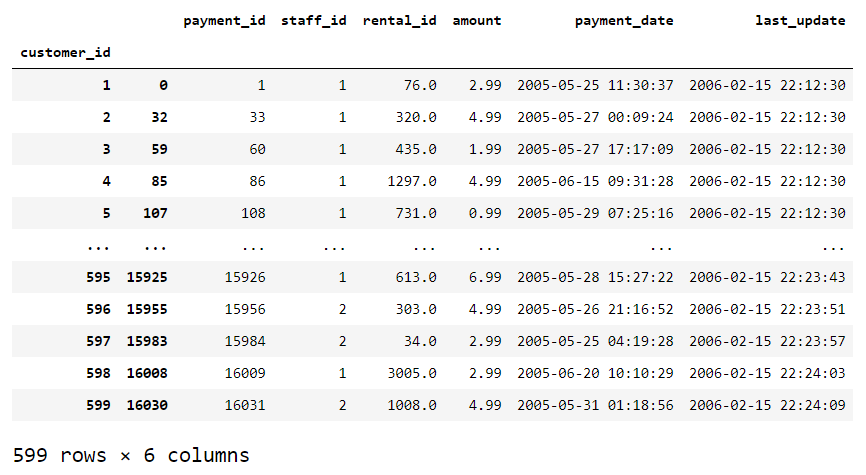

In [45]:
group.apply(lambda df : df.head(1))

,,payment_id,staff_id,rental_id,amount,payment_date,last_update
customer_id,,,,,,,
1,0,1,1,76.0,2.99,2005-05-25 11:30:37,2006-02-15 22:12:30
2,32,33,1,320.0,4.99,2005-05-27 00:09:24,2006-02-15 22:12:30
3,59,60,1,435.0,1.99,2005-05-27 17:17:09,2006-02-15 22:12:30
4,85,86,1,1297.0,4.99,2005-06-15 09:31:28,2006-02-15 22:12:30
5,107,108,1,731.0,0.99,2005-05-29 07:25:16,2006-02-15 22:12:30
...,...,...,...,...,...,...,...
595,15925,15926,1,613.0,6.99,2005-05-28 15:27:22,2006-02-15 22:23:43
596,15955,15956,2,303.0,4.99,2005-05-26 21:16:52,2006-02-15 22:23:51
597,15983,15984,2,34.0,2.99,2005-05-25 04:19:28,2006-02-15 22:23:57


## 도전 : 유저별 최근 3개 구매 내역
- hint: apply() 

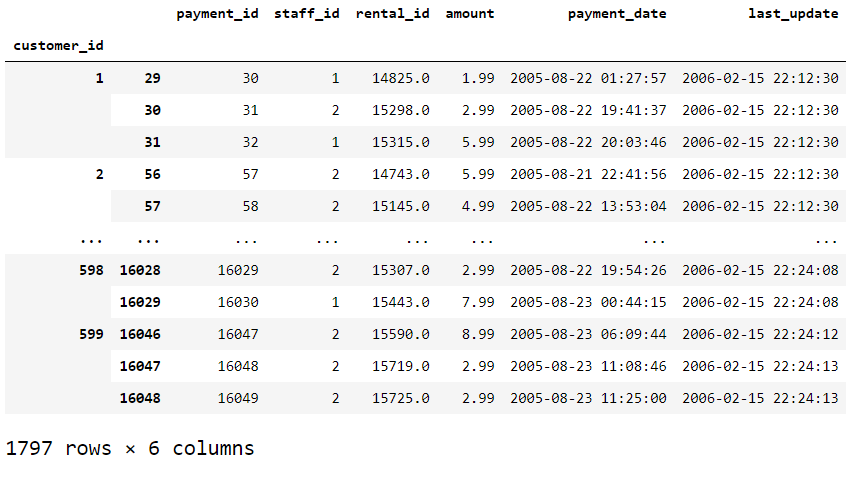

In [46]:
group.apply(lambda df : df.tail(3))

payment_id  staff_id  rental_id  amount  \
customer_id                                                  
1           29             30         1    14825.0    1.99   
            30             31         2    15298.0    2.99   
            31             32         1    15315.0    5.99   
2           56             57         2    14743.0    5.99   
            57             58         2    15145.0    4.99   
...                       ...       ...        ...     ...   
598         16028       16029         2    15307.0    2.99   
            16029       16030         1    15443.0    7.99   
599         16046       16047         2    15590.0    8.99   
            16047       16048         2    15719.0    2.99   
            16048       16049         2    15725.0    2.99   

                          payment_date          last_update  
customer_id                                                  
1           29     2005-08-22 01:27:57  2006-02-15 22:12:30  
            30     2005-08-22 19:41:37  2006-02-15 22:12:30  
            31     2005-08-22 20:03:46  2006-02-15 22:12:30  
2           56     2005-08-21 22:41:56  2006-02-15 22:12:30  
            57     2005-08-22 13:53:04  2006-02-15 22:12:30  
...                                ...                  ...  
598         16028  2005-08-22 19:54:26  2006-02-15 22:24:08  
            16029  2005-08-23 00:44:15  2006-02-15 22:24:08  
599         16046  2005-08-23 06:09:44  2006-02-15 22:24:12  
            16047  2005-08-23 11:08:46  2006-02-15 22:24:13  
            16048  2005-08-23 11:25:00  2006-02-15 22:24:13  

[1797 rows x 6 columns]

# 고객별 첫 구매일, 마지막 구매일
- 결제횟수, 결제금액, 첫 구매일, 마지막 구매일

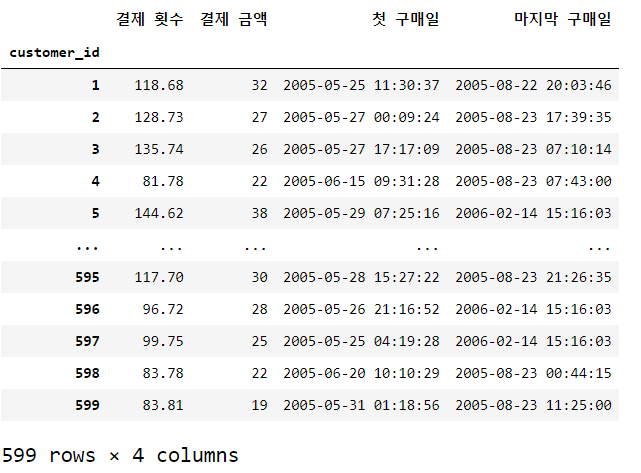

1. agg() 사용한 방법
1. apply() 사용한 방법

## agg() 사용

In [48]:
group.agg({
    "amount": ['count', 'sum']
})['amount']

,count,sum
customer_id,,
1,32,118.68
2,27,128.73
3,26,135.74
4,22,81.78
5,38,144.62
...,...,...
595,30,117.70
596,28,96.72
597,25,99.75


In [53]:
group.get_group(1)['payment_date']

0     2005-05-25 11:30:37
1     2005-05-28 10:35:23
2     2005-06-15 00:54:12
3     2005-06-15 18:02:53
4     2005-06-15 21:08:46
5     2005-06-16 15:18:57
6     2005-06-18 08:41:48
7     2005-06-18 13:33:59
8     2005-06-21 06:24:45
9     2005-07-08 03:17:05
10    2005-07-08 07:33:56
11    2005-07-09 13:24:07
12    2005-07-09 16:38:01
13    2005-07-11 10:13:46
14    2005-07-27 11:31:22
15    2005-07-28 09:04:45
16    2005-07-28 16:18:23
17    2005-07-28 17:33:39
18    2005-07-28 19:20:07
19    2005-07-29 03:58:49
20    2005-07-31 02:42:18
21    2005-08-01 08:51:04
22    2005-08-02 15:36:52
23    2005-08-02 18:01:38
24    2005-08-17 12:37:54
25    2005-08-18 03:57:29
26    2005-08-19 09:55:16
27    2005-08-19 13:56:54
28    2005-08-21 23:33:57
29    2005-08-22 01:27:57
30    2005-08-22 19:41:37
31    2005-08-22 20:03:46
Name: payment_date, dtype: object

In [55]:
group.agg({
     "amount": ['count', 'sum'],
    "payment_date" : [
        lambda x : x.values[0],
        lambda x : x.values[-1]
    ]
})

amount                 payment_date                     
             count     sum           <lambda_0>           <lambda_1>
customer_id                                                         
1               32  118.68  2005-05-25 11:30:37  2005-08-22 20:03:46
2               27  128.73  2005-05-27 00:09:24  2005-08-23 17:39:35
3               26  135.74  2005-05-27 17:17:09  2005-08-23 07:10:14
4               22   81.78  2005-06-15 09:31:28  2005-08-23 07:43:00
5               38  144.62  2005-05-29 07:25:16  2006-02-14 15:16:03
...            ...     ...                  ...                  ...
595             30  117.70  2005-05-28 15:27:22  2005-08-23 21:26:35
596             28   96.72  2005-05-26 21:16:52  2006-02-14 15:16:03
597             25   99.75  2005-05-25 04:19:28  2006-02-14 15:16:03
598             22   83.78  2005-06-20 10:10:29  2005-08-23 00:44:15
599             19   83.81  2005-05-31 01:18:56  2005-08-23 11:25:00

[599 rows x 4 columns]

In [58]:
group.agg({
     "amount": ['count', 'sum'],
    "payment_date" : [
        lambda x : x.values[0],
        lambda x : x.values[-1]
    ]
})\
.droplevel(0, axis=1)\
.rename(columns={
    "count":"결제횟수",
    "sum":"결제금액",
    "<lambda_0>":"첫 구매일",
    "<lambda_1>":"마지막 구매일"
})

# 위와 같이 agg 에 적용되는 함수가 단순히 "sum" "count".. 만 있는게 아니라
# 개발자가 제공하는 임의의 함수도 적용할수 있다는 사실 기억!

,결제횟수,결제금액,첫 구매일,마지막 구매일
customer_id,,,,
1,32,118.68,2005-05-25 11:30:37,2005-08-22 20:03:46
2,27,128.73,2005-05-27 00:09:24,2005-08-23 17:39:35
3,26,135.74,2005-05-27 17:17:09,2005-08-23 07:10:14
4,22,81.78,2005-06-15 09:31:28,2005-08-23 07:43:00
5,38,144.62,2005-05-29 07:25:16,2006-02-14 15:16:03
...,...,...,...,...
595,30,117.70,2005-05-28 15:27:22,2005-08-23 21:26:35
596,28,96.72,2005-05-26 21:16:52,2006-02-14 15:16:03
597,25,99.75,2005-05-25 04:19:28,2006-02-14 15:16:03


### apply() 를 사용하기

In [59]:
# 결제횟수, 결제금액, 첫/마지막 구매일
def get_data_from_customer_df(df):
    return pd.Series(
        [
            df.amount.sum(),
            df.amount.count(),
            df.payment_date.iloc[0],
            df.payment_date.values[-1]
        ],
        index = ['결제금액','결제횟수','첫 구매일','마지막 구매일']
    )

group.apply(get_data_from_customer_df)

,결제금액,결제횟수,첫 구매일,마지막 구매일
customer_id,,,,
1,118.68,32,2005-05-25 11:30:37,2005-08-22 20:03:46
2,128.73,27,2005-05-27 00:09:24,2005-08-23 17:39:35
3,135.74,26,2005-05-27 17:17:09,2005-08-23 07:10:14
4,81.78,22,2005-06-15 09:31:28,2005-08-23 07:43:00
5,144.62,38,2005-05-29 07:25:16,2006-02-14 15:16:03
...,...,...,...,...
595,117.70,30,2005-05-28 15:27:22,2005-08-23 21:26:35
596,96.72,28,2005-05-26 21:16:52,2006-02-14 15:16:03
597,99.75,25,2005-05-25 04:19:28,2006-02-14 15:16:03


In [66]:
# 위에서 [0] 을 쓰지 않고 iloc[0] 을 한 이유!

# group.get_group(10).payment_date[0]  # 에러
group.get_group(10).payment_date.iloc[0]

'2005-05-31 19:36:30'

# 유저별 x 월별 집계

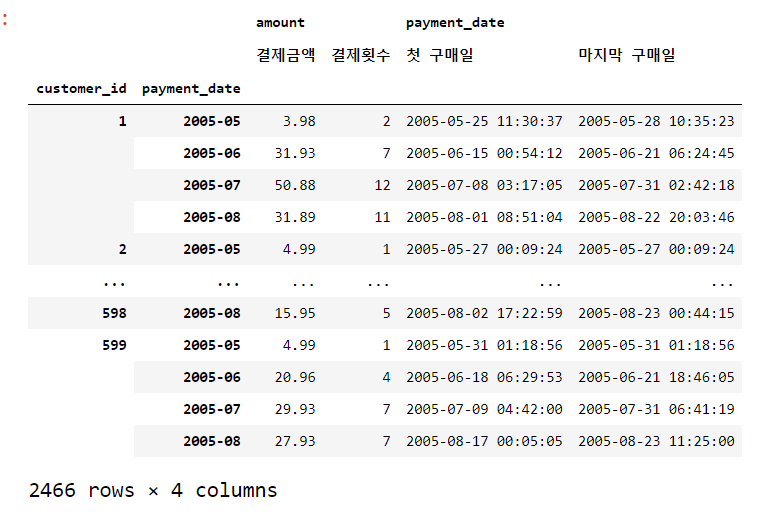

In [71]:
payment_df.payment_date.apply(lambda x: str(x)[:7])

0        2005-05
1        2005-05
2        2005-06
3        2005-06
4        2005-06
          ...   
16044    2005-08
16045    2005-08
16046    2005-08
16047    2005-08
16048    2005-08
Name: payment_date, Length: 16049, dtype: object

In [75]:
payment_df.groupby(["customer_id", payment_df.payment_date.apply(lambda x: str(x)[:7])]).size()

customer_id  payment_date
1            2005-05          2
             2005-06          7
             2005-07         12
             2005-08         11
2            2005-05          1
                             ..
598          2005-08          5
599          2005-05          1
             2005-06          4
             2005-07          7
             2005-08          7
Length: 2466, dtype: int64

In [78]:
payment_df.groupby([
    "customer_id", 
    payment_df.payment_date.apply(lambda x: str(x)[:7])
]).agg(
    {
        "amount" : ["sum", "count"],
        "payment_date" : [
            lambda x : x.values[0],
            lambda x : x.values[-1]
        ]
    }
).rename(columns={
    "sum" : "결제금액",
    "count" : "결제횟수",
    "<lambda_0>" : "첫 구매일",
    "<lambda_1>" : "마지막 구매일"
})

amount              payment_date                     
                           결제금액 결제횟수                첫 구매일              마지막 구매일
customer_id payment_date                                                      
1           2005-05        3.98    2  2005-05-25 11:30:37  2005-05-28 10:35:23
            2005-06       31.93    7  2005-06-15 00:54:12  2005-06-21 06:24:45
            2005-07       50.88   12  2005-07-08 03:17:05  2005-07-31 02:42:18
            2005-08       31.89   11  2005-08-01 08:51:04  2005-08-22 20:03:46
2           2005-05        4.99    1  2005-05-27 00:09:24  2005-05-27 00:09:24
...                         ...  ...                  ...                  ...
598         2005-08       15.95    5  2005-08-02 17:22:59  2005-08-23 00:44:15
599         2005-05        4.99    1  2005-05-31 01:18:56  2005-05-31 01:18:56
            2005-06       20.96    4  2005-06-18 06:29:53  2005-06-21 18:46:05
            2005-07       29.93    7  2005-07-09 04:42:00  2005-07-31 06:41:19
            2005-08       27.93    7  2005-08-17 00:05:05  2005-08-23 11:25:00

[2466 rows x 4 columns]

# 각 결제 내역이 결제한 유저의  평균 결제 금액보다 얼마나 큰가/작은가
- ① transform() 사용
- ② apply() 사용 

In [82]:
group.get_group(1).mean()['amount']

3.7087499999999975

In [83]:
group.agg({"amount": np.mean})

,amount
customer_id,
1,3.708750
2,4.767778
3,5.220769
4,3.717273
5,3.805789
...,...
595,3.923333
596,3.454286
597,3.990000


### 1. transform() 사용

In [84]:
group.transform("mean")

,payment_id,staff_id,rental_id,amount
0,16.5,1.468750,7535.531250,3.708750
1,16.5,1.468750,7535.531250,3.708750
2,16.5,1.468750,7535.531250,3.708750
3,16.5,1.468750,7535.531250,3.708750
4,16.5,1.468750,7535.531250,3.708750
...,...,...,...,...
16044,16040.0,1.578947,8849.157895,4.411053
16045,16040.0,1.578947,8849.157895,4.411053
16046,16040.0,1.578947,8849.157895,4.411053
16047,16040.0,1.578947,8849.157895,4.411053


In [85]:
group.agg("mean")

,payment_id,staff_id,rental_id,amount
customer_id,,,,
1,16.5,1.468750,7535.531250,3.708750
2,46.0,1.444444,9545.037037,4.767778
3,72.5,1.461538,7928.884615,5.220769
4,96.5,1.454545,8962.454545,3.717273
5,126.5,1.552632,7917.289474,3.805789
...,...,...,...,...
595,15940.5,1.433333,8314.533333,3.923333
596,15969.5,1.392857,8248.250000,3.454286
597,15996.0,1.440000,8750.880000,3.990000


In [87]:
# 각 결제 내역에서 결제한 유저의 평균결제금액보다 얼마나 큰가/작은가 ?
group.transform(lambda x : x - x.mean())['amount']

0       -0.718750
1       -2.718750
2        2.281250
3       -2.718750
4        6.281250
           ...   
16044    0.578947
16045   -2.421053
16046    4.578947
16047   -1.421053
16048   -1.421053
Name: amount, Length: 16049, dtype: float64

### apply() 로 만들기

In [90]:
group.get_group(1)['amount']  - group.get_group(1)['amount'].mean()

0    -0.71875
1    -2.71875
2     2.28125
3    -2.71875
4     6.28125
5     1.28125
6     1.28125
7    -2.71875
8     0.28125
9     2.28125
10    2.28125
11    1.28125
12    1.28125
13    4.28125
14   -0.71875
15    1.28125
16    1.28125
17   -2.71875
18   -2.71875
19   -0.71875
20   -0.71875
21    1.28125
22    0.28125
23   -2.71875
24    1.28125
25   -2.71875
26   -2.71875
27   -0.71875
28   -2.71875
29   -1.71875
30   -0.71875
31    2.28125
Name: amount, dtype: float64

In [91]:
group.apply(lambda x : x['amount'] - x['amount'].mean())

customer_id       
1            0       -0.718750
             1       -2.718750
             2        2.281250
             3       -2.718750
             4        6.281250
                        ...   
599          16044    0.578947
             16045   -2.421053
             16046    4.578947
             16047   -1.421053
             16048   -1.421053
Name: amount, Length: 16049, dtype: float64